<a href="https://colab.research.google.com/github/Ayavie/Data_problems/blob/main/Data_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook includes data problems related to Linear Regression, ways to discover them and ways to tackle them! 😉


Data Problems:
1. Non-Linearity
2. Multicollinearity
3. Heteroscedasticity

## Non-linearity

Linear regression assumes that the relationship between the independent and dependent variables is linear. If this assumption is not met, the model may perform poorly and provide inaccurate predictions. One way to address non-linearity is to transform the variables using techniques such as

**Ways to discover non-linearity**:
1. Scatter plots: Scatter plots can be used to visualize the relationship between two variables and detect non-linearity. If the points on the scatter plot follow a curved or nonlinear pattern, this may indicate non-linearity.

2. Residual plots: Residual plots can be used to detect non-linearity in a regression model. If the residuals (the difference between the predicted and actual values) show a pattern, such as a curved or nonlinear pattern, this may indicate non-linearity.

**Ways to fix the problem**:
1. Polynomial transformation.
2. Logarithmic transformation


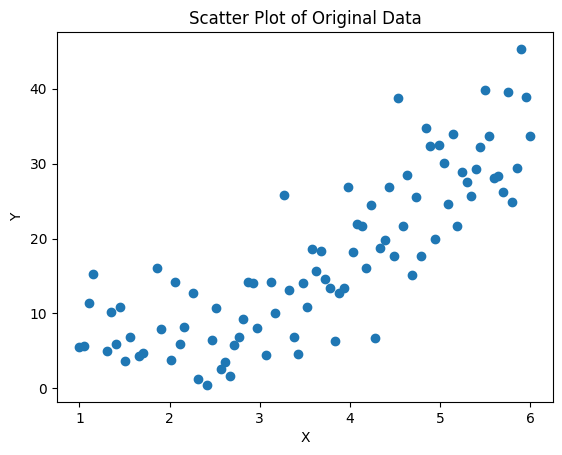

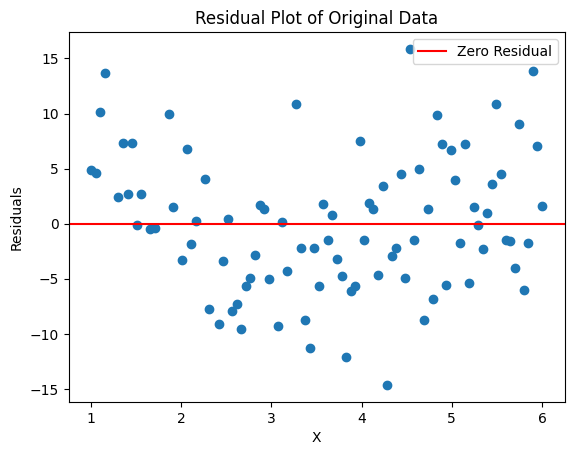

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# generate random data with non-linear quadratic curve
x = np.linspace(1, 6, 100)
y = x**2 + np.random.normal(1, 6, 100)

# get index of elements <= 0 and remove them from x and y
zero_idx = [ i for i in range(len(y)) if y[i]<= 0 ]
x = np.delete(x,zero_idx)
y = np.delete(y,zero_idx)

# plot the original data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Original Data')
plt.show()

# Instantiate the model and fit the data
lr = LinearRegression().fit(x.reshape(-1, 1),y)
y_pred = lr.predict(x.reshape(-1, 1))

# plot the residuals of original data
plt.scatter(x, y - y_pred)
plt.axhline(y=0, color='r', linestyle='-', label='Zero Residual')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot of Original Data')
plt.legend()
plt.show()


### Polynomial transformation
Polynomial transformation is a data transformation technique that involves adding higher-order terms to a regression model to capture the non-linear relationships between the predictor and outcome variables. Specifically, polynomial transformation involves raising the predictor variable to a power, such as 2, 3, or 4, to capture the curvature and non-linear patterns in the data.

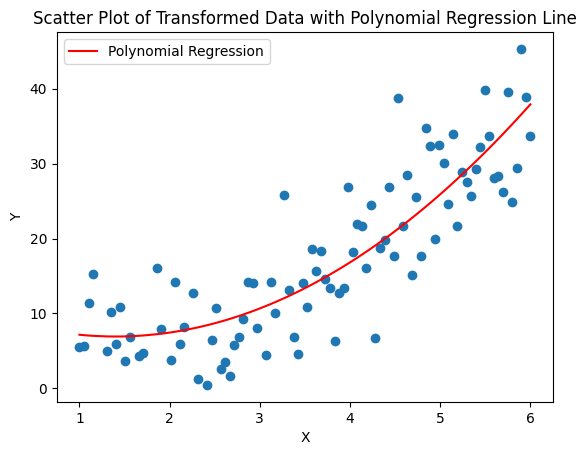

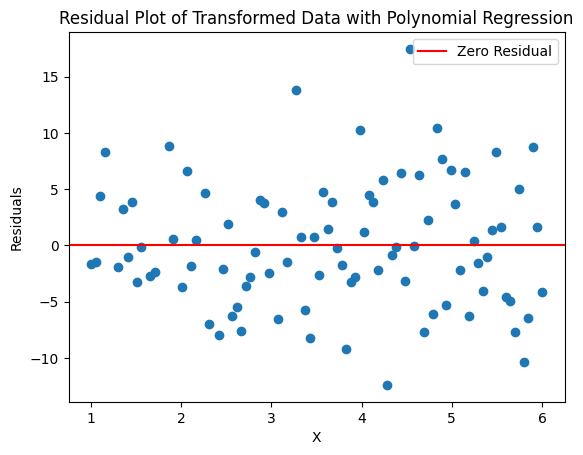

In [ ]:
# apply polynomial transformation
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# fit and predict using polynomial regression
model_poly = LinearRegression().fit(x_poly, y)
y_pred_poly = model_poly.predict(x_poly)

# plot the transformed data and polynomial regression line
plt.scatter(x, y)
plt.plot(x, y_pred_poly, color='r', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Transformed Data with Polynomial Regression Line')
plt.legend()
plt.show()


# plot the residuals using polynomial regression
plt.scatter(x, y - y_pred_poly)
plt.axhline(y=0, color='r', linestyle='-', label='Zero Residual')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot of Transformed Data with Polynomial Regression')
plt.legend()
plt.show()

### Log Transformation
A residual plot is a scatter plot of the residuals (the differences between the predicted values and the actual values of the dependent variable) against the predictor variable. A residual plot that shows a random pattern with no visible trends indicates that the linear regression model has captured the linear relationship between the predictor and outcome variables, and the non-linear patterns in the data have been reduced. On the other hand, a residual plot that shows a curved or U-shaped pattern indicates that the linear regression model has not captured the non-linear patterns in the data, and the model may benefit from the addition of higher-order terms or other non-linear transformations.

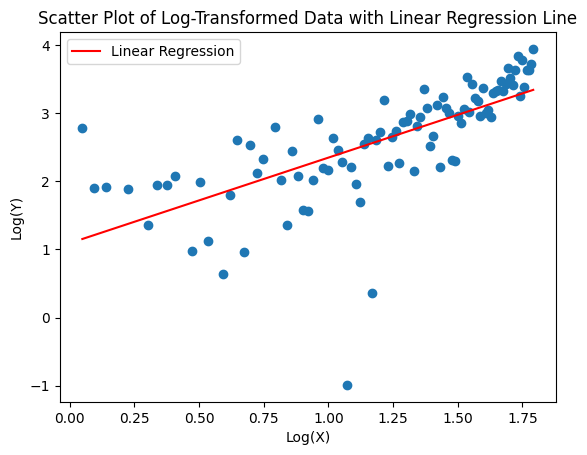

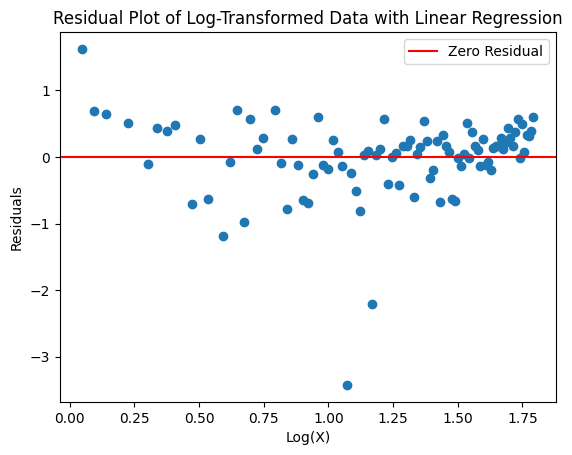

In [ ]:
# apply log transformation
x_log = np.log(x)
y_log = np.log(y)

# fit and predict using linear regression with log-transformed data
model_log = LinearRegression().fit(x_log.reshape(-1, 1), y_log)
y_pred_log = model_log.predict(x_log.reshape(-1, 1))

# plot the log-transformed data and linear regression line
plt.scatter(x_log, y_log)
plt.plot(x_log, y_pred_log, color='r', label='Linear Regression')
plt.xlabel('Log(X)')
plt.ylabel('Log(Y)')
plt.title('Scatter Plot of Log-Transformed Data with Linear Regression Line')
plt.legend()
plt.show()

# plot the residuals using linear regression with log-transformed data
plt.scatter(x_log, y_log - y_pred_log)
plt.axhline(y=0, color='r', linestyle='-', label='Zero Residual')
plt.xlabel('Log(X)')
plt.ylabel('Residuals')
plt.title('Residual Plot of Log-Transformed Data with Linear Regression')
plt.legend()
plt.show()

## Multicollinearity
Multicollinearity occurs when two or more independent variables in a linear regression model are highly correlated with each other. This can lead to unstable and unreliable estimates of the regression coefficients and also takes more time for convergence.
This part includes diabetes data from sklearn.

**Ways to discover multicollinearity**:
1. Correlation Matrix
2. VIF: Variance Inflation Factor

**Ways to fix the problem**:
1. Use principle component analysis (PCA)
2. Use regularization technique
3. Remove one of the correlated variables: If two or more predictor variables are highly correlated, you may choose to remove one of them from the analysis. This will reduce the multicollinearity in the model, but may also result in a loss of information. You should choose the variable to remove based on its importance to the analysis and its correlation with the other variables.
4. Increase the sample size: Multicollinearity is often a problem when the sample size is small. Increasing the sample size can help reduce the effect of multicollinearity by providing more variation in the data.

In this problem, we will try solutions number 1 and 2.

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()

# Separate the features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a dataframe of the data
df = pd.DataFrame(data=X_scaled, columns=diabetes.feature_names)


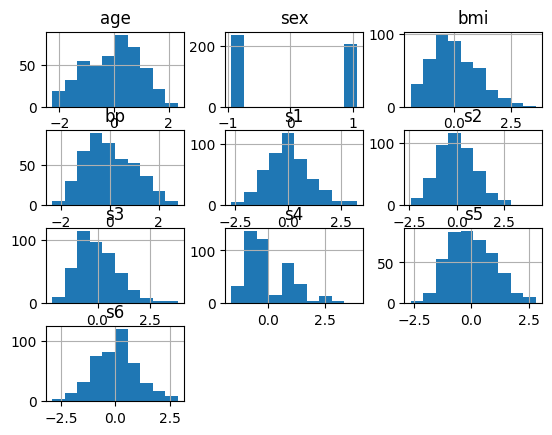

In [ ]:
df.hist();

<ipython-input-27-4df91a272d23>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if col == y:


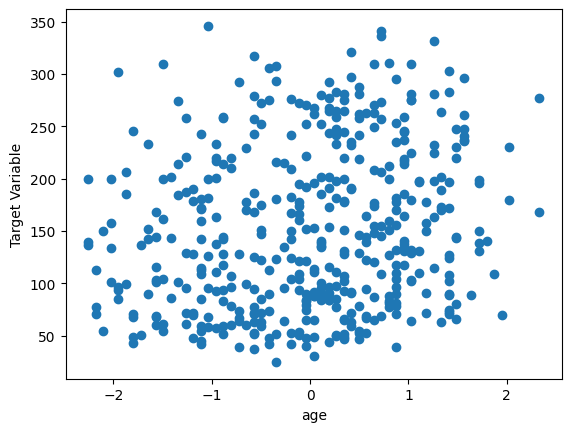

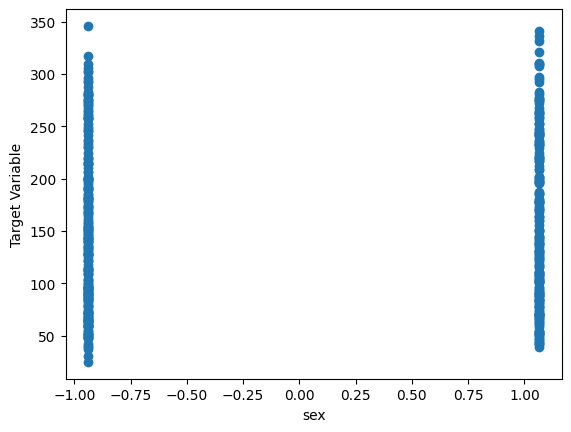

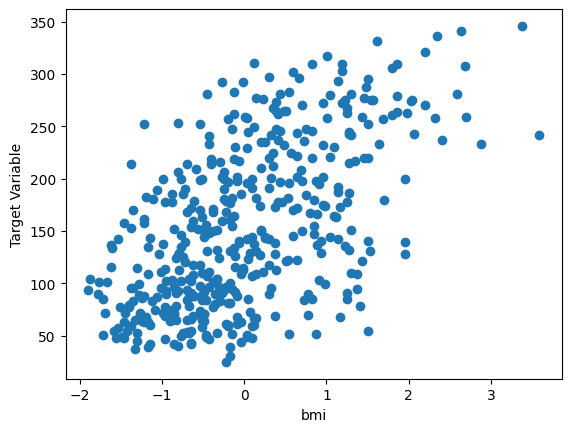

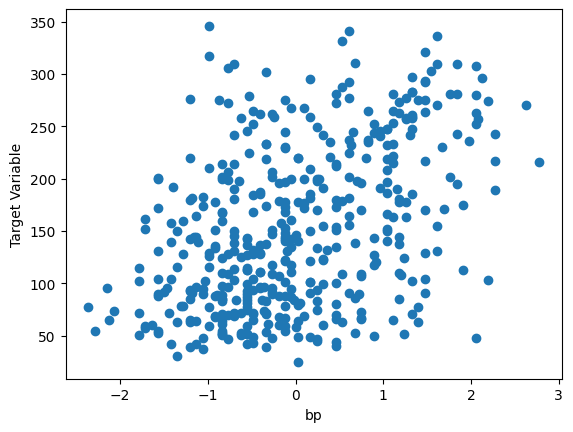

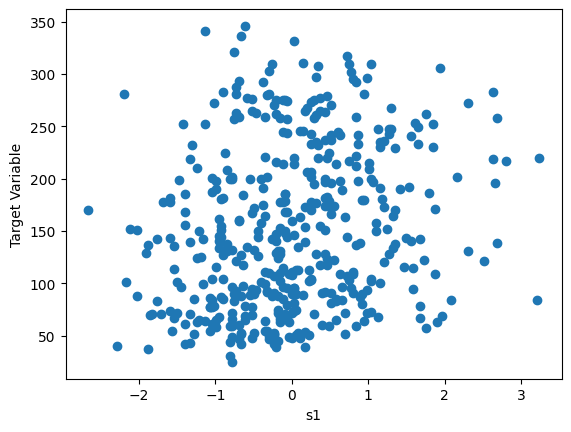

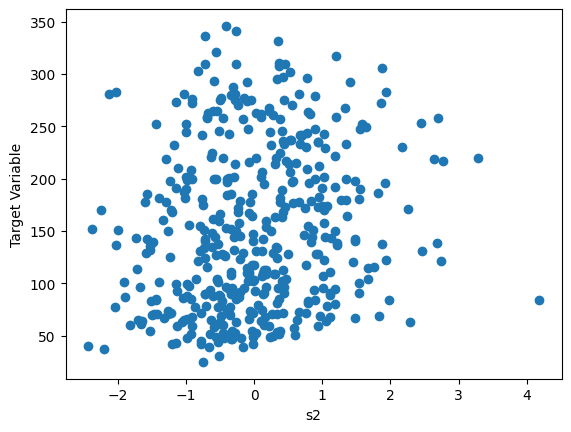

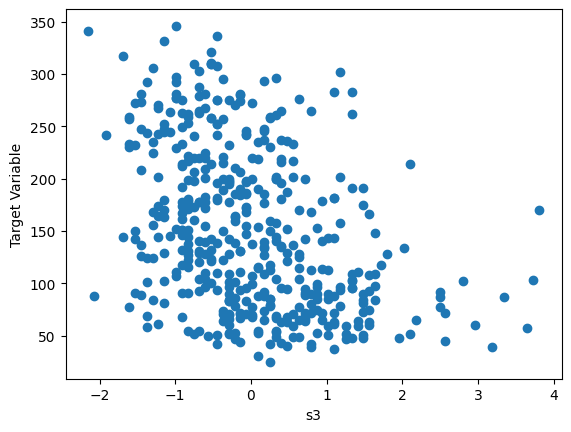

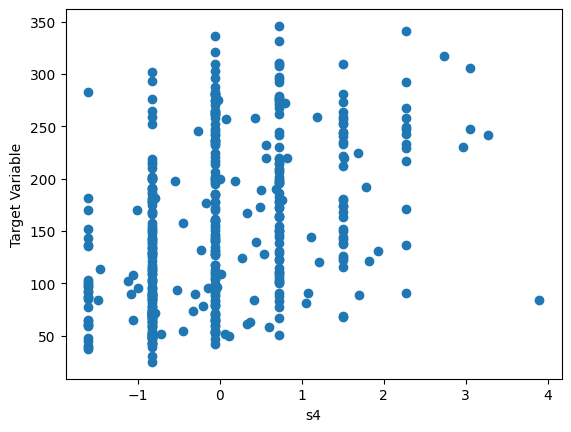

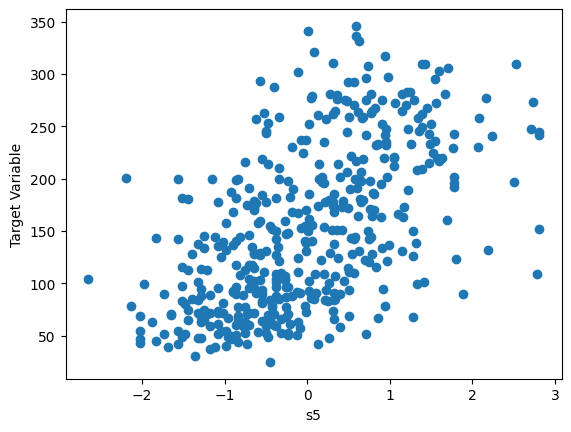

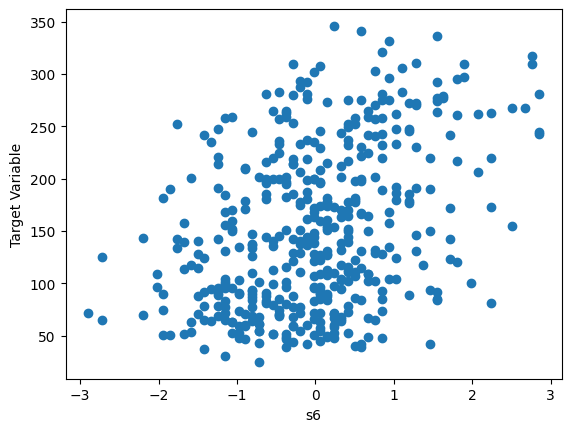

In [ ]:
for col in df.columns:
  if col == y:
    continue
  plt.scatter(df[col],y)
  plt.xlabel(col)
  plt.ylabel("Target Variable")
  plt.show()

### Correlation Matrix

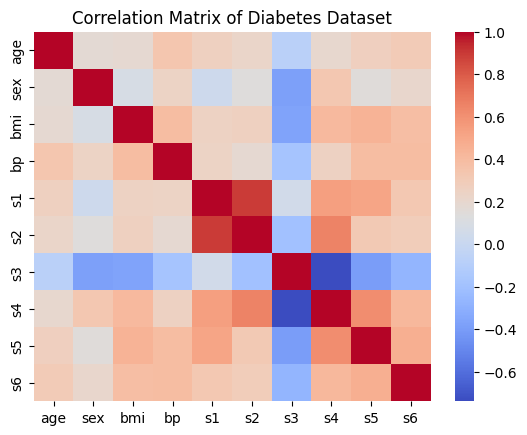

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

### VIF (Variance Inflation Factor)
It is a measure of the amount of multicollinearity (high correlation between predictor variables) in a set of predictor variables in a regression model. VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity in the predictor variables.

To calculate VIF:

1. We fit a multiple regression model using all the predictor variables in your dataset.

2. Calculate the VIF for each predictor variable. The VIF for a predictor variable is calculated as 1/(1-R^2), where R^2 is the coefficient of determination from a regression model that regresses that predictor variable on all the other predictor variables in the dataset.

3. Check the VIF values for each predictor variable. If a predictor variable has a VIF greater than 5 or 10, it indicates that there is a high level of multicollinearity in the predictor variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make VIF dataframe
vif_df = pd.DataFrame()

# Calculate VIF for each predictor
vif_df["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Create a column to list each feature name
vif_df["Feature"] = diabetes.feature_names


vif_df

,VIF Factor,Feature
0,1.217307,age
1,1.278071,sex
2,1.509437,bmi
3,1.459428,bp
4,59.202510,s1
5,39.193370,s2
6,15.402156,s3
7,8.890986,s4
8,10.075967,s5
9,1.484623,s6


As we can see, features like `s1`,`s2`,`s3`,`s5` have VIF higher than 5 which means that the variance of the estimated coefficient of the regression model is increased which means the coefficient values are unstable and unreliable.

### Fitting Multiple Linear Regression Model on the data before fixing the problem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

xtr,xts,ytr,yts = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Create Linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(xtr,ytr)

# Predict the test data
y_pred = model.predict(xts)

# calculate r-squared error
r2_org = r2_score(yts,y_pred)

# Print R-squared score
print("R-squared score:", r2_org)

R-squared score: 0.4526027629719196


### PCA solution

PCA can be used to fix multicollinearity by identifying and removing the linear dependencies between the predictor variables. PCA works by identifying a set of orthogonal linear combinations of the original predictor variables, called principal components (PCs), that capture the most variation in the data. The PCs are uncorrelated with each other, meaning that there is no multicollinearity between them.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Instantiate PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)
print(pca.explained_variance_ratio_)

# Get the number of components needed to explain 80% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.70) + 1 #Adding 1 as this is zero-index

# Create new dataframe with PCA components
X_pca_df = pd.DataFrame(X_pca[:,:n_components], columns=[f"PC {i}" for i in range(1,n_components+1)])
X_pca_df

(442, 10)
[0.40242108 0.14923197 0.12059663 0.09554764 0.06621814 0.06027171
 0.05365657 0.0433682  0.007832   0.00085607]


,PC 1,PC 2,PC 3,PC 4
0,0.587199,-1.946832,0.589205,-0.082816
1,-2.831625,1.372082,0.027930,-0.470008
2,0.272129,-1.634901,0.739244,-0.791492
3,0.049281,0.382278,-2.013032,1.373216
4,-0.756421,0.811960,-0.057238,-0.137495
...,...,...,...,...
437,1.239525,-1.035968,0.928679,-0.656264
438,1.264719,0.761319,-1.750191,-1.133464
439,-0.205206,-1.205487,0.496186,-1.353370
440,0.692871,0.210127,-0.868724,1.616793


In [ ]:
X_pca_df.values

array([[ 0.58719913, -1.9468322 ,  0.58920548, -0.08281558],
       [-2.83162538,  1.37208173,  0.02792987, -0.47000841],
       [ 0.27212855, -1.63490124,  0.73924374, -0.79149227],
       ...,
       [-0.20520638, -1.20548723,  0.4961862 , -1.35336985],
       [ 0.69287112,  0.2101271 , -0.86872416,  1.61679332],
       [-1.90394067,  3.97577657, -0.04833791, -0.22062889]])

In [ ]:
for i in range(X_pca_df.shape[1]):
  print(i)


0
1
2
3


In [ ]:
vif_pca = pd.DataFrame()
vif_pca["VIF_factor"] = [variance_inflation_factor(X_pca_df.values,i) for i in range(X_pca_df.shape[1])]
vif_pca["feature"] = X_pca_df.columns

print("VIF before applying PCA: ")
print(vif_df)
print("VIF after applying PCA: ")
print(vif_pca)

VIF before applying PCA: 
   VIF Factor Feature
0    1.217307     age
1    1.278071     sex
2    1.509437     bmi
3    1.459428      bp
4   59.202510      s1
5   39.193370      s2
6   15.402156      s3
7    8.890986      s4
8   10.075967      s5
9    1.484623      s6
VIF after applying PCA: 
   VIF_factor feature
0         1.0    PC 1
1         1.0    PC 2
2         1.0    PC 3
3         1.0    PC 4


Woah!! The VIF values for the PCA components is 1 which is much lower than those for the original variables, indicating that the multicollinearity is gone!

#### Fitting Multiple Linear Regression after applying PCA



In [ ]:
X_pca.shape

(442, 10)

In [ ]:
xtr,xts,ytr,yts = train_test_split(X_pca,y,test_size=0.2,random_state=42)

# Create Linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(xtr,ytr)

# Predict the test data
y_pred = model.predict(xts)

# calculate r-squared error
r2_pca = r2_score(yts,y_pred)

# Print R-squared score
print("R-squared score:", r2_pca)

R-squared score: 0.45260276297191926


In [ ]:
(r2_org,r2_pca)

(0.4526027629719196, 0.45260276297191926)

It's important to note that PCA can result in a loss of interpretability because the principal components (PCs) obtained from the analysis are combinations of the original predictor variables, and may not have a clear meaning in terms of the original variables. So, it's important to consider the trade-off between multicollinearity reduction and interpretability when using PCA.

### Regularization solution (Ridge Regression)
Since multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other, ridge regression works by adding a penalty term to the sum of squared errors, which is proportional to the square of the magnitude of the regression coefficients. This penalty term helps to reduce the size of the regression coefficients to reduce the impact of these variables.


In [ ]:
# Split the data
xtr,xts,ytr,yts = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Instantiate ridge
ridge = Ridge(alpha=0.3)

#Fit Ridge regression
ridge.fit(xtr, ytr)

# Predict test data
y_pred = ridge.predict(xts)

#Calculate r2
r2_rdg = r2_score(yts,y_pred)

print(r2_rdg)

0.4531946476898082


Comparing the value of errors in original linear regression, after appling PCA, after applying ridge regressor

Text(0, 0.5, 'Error')

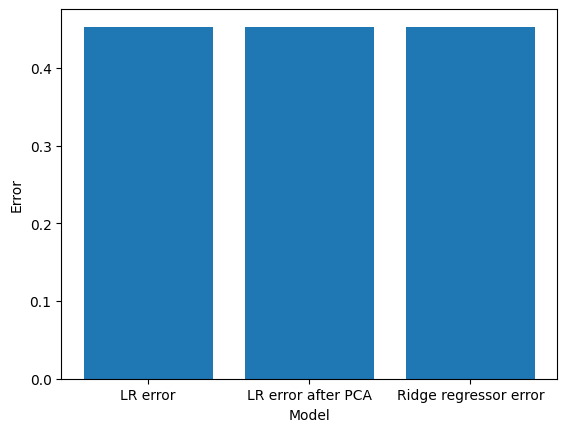

In [ ]:
vals = [r2_org,r2_pca,r2_rdg]
labels = ['LR error', 'LR error after PCA', 'Ridge regressor error']
plt.bar(labels,vals);
plt.xlabel("Model")
plt.ylabel("Error")

The error is almost the same, can you guess why?

# Heteroscedasticity
Heteroscedasticity is a common problem that can occur in statistical modeling and regression analysis. It refers to the situation where the variance of the residuals (i.e., the difference between the predicted values and the actual values) is not constant across the range of the independent variables. In other words, the spread of the residuals changes as the values of the independent variables change.

Heteroscedasticity can cause several issues, such as biased parameter estimates, incorrect standard errors, and decreased predictive accuracy.

**Ways to discover heteroscedasticity:**
* Scatter plot

> It can be spotted using Scatter plot of residuals against independent
variables, if there is a pattern in the scatterplot, such as a cone shape or a curve, this may indicate heteroscedasticity. Since Heteroscedasticity means that the spread of the residuals is not constant across all levels of the independent variable(s)

**Ways to fix the problem:**
* Weighted Least Square Regression Model

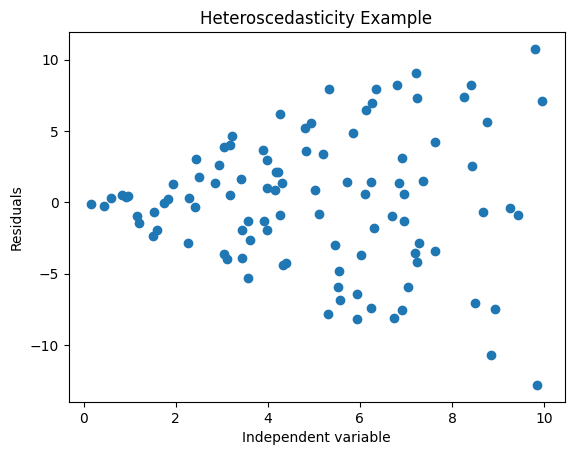

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generate some random data with heteroscedasticity
np.random.seed(123)
X = np.random.rand(100, 1) * 10
y = (X * np.random.rand(100, 1) * 3).flatten()

# fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# plot the residuals against the independent variable
residuals = y - model.predict(X)
plt.scatter(X, residuals)
plt.xlabel('Independent variable')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity Example')
plt.show()

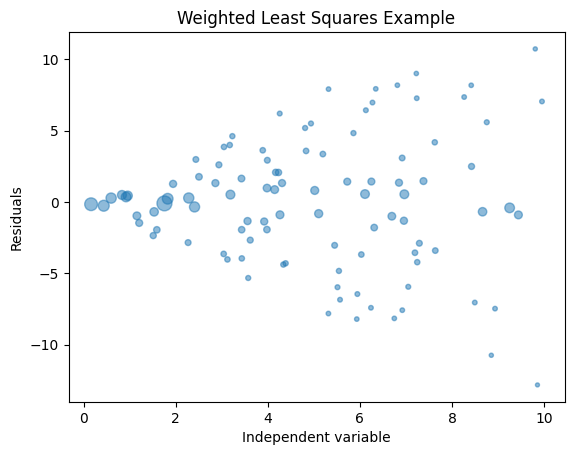

In [ ]:
# calculate the weights based on the variances of the residuals
residuals = y - model.predict(X)
weights = 1 / np.sqrt(np.abs(residuals))

# fit a weighted least squares regression model
model = LinearRegression()
model.fit(X, y, sample_weight=weights)

# plot the residuals against the independent variable
residuals = y - model.predict(X)
plt.scatter(X, residuals, s=weights*30, alpha=0.5)
plt.xlabel('Independent variable')
plt.ylabel('Residuals')
plt.title('Weighted Least Squares Example')
plt.show()

The resulting plot shows that the spread of the residuals is now more constant (Weighted) across the range of the independent variable, indicating that the heteroscedasticity problem has been addressed.

Note: If your data has multiple independent variables, which is the case for most of the times, re-do the same process for each one of the independent variables.